In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
import seaborn as sns

In [2]:
x = pd.read_csv('D:/Project_Restaurant_Chain/Full/features_normalised.csv')

In [3]:
y = pd.read_csv('D:/Project_Restaurant_Chain/Full/total_covers.csv')

In [3]:
y_with_areas = pd.read_csv('D:/Project_Restaurant_Chain/Full/total_covers_with_areas.csv')

In [4]:
x

,Unnamed: 0,total_gross_sales,total_tip,total_discount,total_cost,total_stock_cost,total_seats,total_inside_seats,ground_seats,1st_floor_seats,...,Area_Wales,Area_West Midlands,Area_Yorkshire & Humberside,rating_A,rating_B,rating_C,rating_D,rating_E,rating_F,check_time_difference_in_seconds
0,0,0.005239,0.000000,-0.455304,0.092183,0.001699,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.084722
1,1,-0.004395,0.000000,0.000000,0.025483,-0.002832,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000694
2,2,0.000000,0.000000,0.000000,0.000000,0.002247,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
3,3,0.001022,0.000000,0.000000,-0.005925,0.000316,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.008333
4,4,0.001382,0.000000,0.000000,-0.008012,0.002546,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
5,5,0.001434,0.000000,0.000000,-0.008318,0.001381,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.024306
6,6,0.001434,0.000000,0.000000,-0.008318,0.001095,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
7,7,0.001188,0.000000,0.000000,-0.006888,0.000986,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
8,8,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.029167
9,9,0.000000,0.000000,0.000000,0.000000,0.000986,1.0,0.837209,0.780488,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
y

In [6]:
x.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
y.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
y_with_areas.drop(['Unnamed: 0'], axis=1, inplace=True)

## Supervised Model by region (Scotland)

Choose restaurants in Scotland, which has a small size of data, to do the model.

In [9]:
Area_columns = ['Area_East England', 'Area_East Midlands',\
                'Area_Greater London', 'Area_Home Counties', 'Area_Ireland',\
                'Area_North East', 'Area_North West', 'Area_Northern Ireland',\
                'Area_Scotland', 'Area_South East', 'Area_South West', 'Area_Wales',\
                'Area_West Midlands', 'Area_Yorkshire & Humberside']

In [30]:
other_features =['total_gross_sales', 'total_tip', 'total_discount',\
                 'total_cost', 'total_stock_cost', 'total_seats', 'total_inside_seats',\
                 'ground_seats', '1st_floor_seats', 'bar_seats', 'outside_seats',\
                 'private_dining_covers', 'rating_A',\
                 'rating_B', 'rating_C', 'rating_D', 'rating_E', 'rating_F',\
                 'check_time_difference_in_seconds']

In [11]:
x_Scotland = x[x['Area_Scotland']== 1]

In [12]:
x_Scotland

,total_gross_sales,total_tip,total_discount,total_cost,total_stock_cost,total_seats,total_inside_seats,ground_seats,1st_floor_seats,bar_seats,...,Area_Wales,Area_West Midlands,Area_Yorkshire & Humberside,rating_A,rating_B,rating_C,rating_D,rating_E,rating_F,check_time_difference_in_seconds
1961967,0.000000,0.000000,0.000000,0.000000,0.000896,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.331944
1961968,0.000000,0.000000,0.000000,0.000000,0.017766,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.068750
1961969,0.000000,0.000000,0.000000,0.000000,0.021282,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000
1961970,0.000773,0.000000,0.000000,-0.004480,0.000245,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
1961971,0.001324,0.000000,0.000000,-0.007675,0.000817,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.004861
1961972,0.001490,0.000000,0.000000,-0.008639,0.001042,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.001389
1961973,0.002207,0.000000,0.000000,-0.012797,0.000809,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.020139
1961974,0.003096,0.000000,0.000000,-0.017952,0.002636,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.029861
1961975,0.005225,0.000000,0.000000,-0.030300,0.003282,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.042361
1961976,0.004508,0.000000,0.000000,-0.026141,0.002656,0.960784,0.802326,0.378049,0.603175,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000694


In [13]:
x_Scotland.drop(Area_columns, axis=1, inplace=True)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
x_Scotland.head()

,total_gross_sales,total_tip,total_discount,total_cost,total_stock_cost,total_seats,total_inside_seats,ground_seats,1st_floor_seats,bar_seats,outside_seats,private_dining_covers,rating_A,rating_B,rating_C,rating_D,rating_E,rating_F,check_time_difference_in_seconds
1961967,0.000000,0.0,0.0,0.000000,0.000896,0.960784,0.802326,0.378049,0.603175,0.0,0.828571,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.331944
1961968,0.000000,0.0,0.0,0.000000,0.017766,0.960784,0.802326,0.378049,0.603175,0.0,0.828571,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.068750
1961969,0.000000,0.0,0.0,0.000000,0.021282,0.960784,0.802326,0.378049,0.603175,0.0,0.828571,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000
1961970,0.000773,0.0,0.0,-0.004480,0.000245,0.960784,0.802326,0.378049,0.603175,0.0,0.828571,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
1961971,0.001324,0.0,0.0,-0.007675,0.000817,0.960784,0.802326,0.378049,0.603175,0.0,0.828571,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.004861


In [16]:
y_Scotland = y_with_areas[y_with_areas['Area_Scotland']== 1]

In [17]:
y_Scotland

,total_covers,Area_East England,Area_East Midlands,Area_Greater London,Area_Home Counties,Area_Ireland,Area_North East,Area_North West,Area_Northern Ireland,Area_Scotland,Area_South East,Area_South West,Area_Wales,Area_West Midlands,Area_Yorkshire & Humberside
1961967,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1961968,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1961969,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1961970,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1961971,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1961972,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1961973,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1961974,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1961975,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1961976,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
y_Scotland.drop(Area_columns, axis=1, inplace=True)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
y_Scotland.head()

,total_covers
1961967,0
1961968,0
1961969,0
1961970,0
1961971,0


In [24]:
x_Scotland = x_Scotland.reset_index(drop=True)

In [25]:
y_Scotland = y_Scotland.reset_index(drop=True)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [39]:
# Set this range for the logistic regression model
c_range = np.linspace(start=0.001,stop=5,num = 50) 

### Split train and test data

In [41]:
from sklearn.cross_validation import train_test_split

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
train_d_Scotland, test_d_Scotland, train_lab_Scotland, test_lab_Scotland = train_test_split(x_Scotland, y_Scotland)

In [43]:
print(len(train_d_Scotland))
print(len(test_d_Scotland))
print(len(train_lab_Scotland)) 
print(len(test_lab_Scotland))

154847
51616
154847
51616


In [49]:
for c in c_range:
    lr=LogisticRegression(C=c)
    lr.fit(train_d_Scotland, train_lab_Scotland) 
    print('C=',c,', Prediction accuracy =', lr.score(test_d_Scotland, test_lab_Scotland))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C= 0.001 , Prediction accuracy = 0.570462647241
C= 0.103020408163 , Prediction accuracy = 0.590068970862
C= 0.205040816327 , Prediction accuracy = 0.596384841909
C= 0.30706122449 , Prediction accuracy = 0.601867637942
C= 0.409081632653 , Prediction accuracy = 0.603998760074
C= 0.511102040816 , Prediction accuracy = 0.605258059516
C= 0.61312244898 , Prediction accuracy = 0.60618800372
C= 0.715142857143 , Prediction accuracy = 0.60705982641
C= 0.817163265306 , Prediction accuracy = 0.607679789213
C= 0.919183673469 , Prediction accuracy = 0.608106013639
C= 1.02120408163 , Prediction accuracy = 0.608629107254
C= 1.1232244898 , Prediction accuracy = 0.609171574706
C= 1.22524489796 , Prediction accuracy = 0.609869032858
C= 1.32726530612 , Prediction accuracy = 0.61105083695
C= 1.42928571429 , Prediction accuracy = 0.611341444513
C= 1.53130612245 , Prediction accuracy = 0.611651425914
C= 1.63332653061 , Prediction accuracy = 0.611980781153
C= 1.73534693878 , Prediction accuracy = 0.6123101363

When c = 5.0, but the prediction accuracy can reach up to 62%.

#### fit the whole dataset

In [50]:
lr = LogisticRegression(C = 5)
lr.fit(x_Scotland,y_Scotland)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

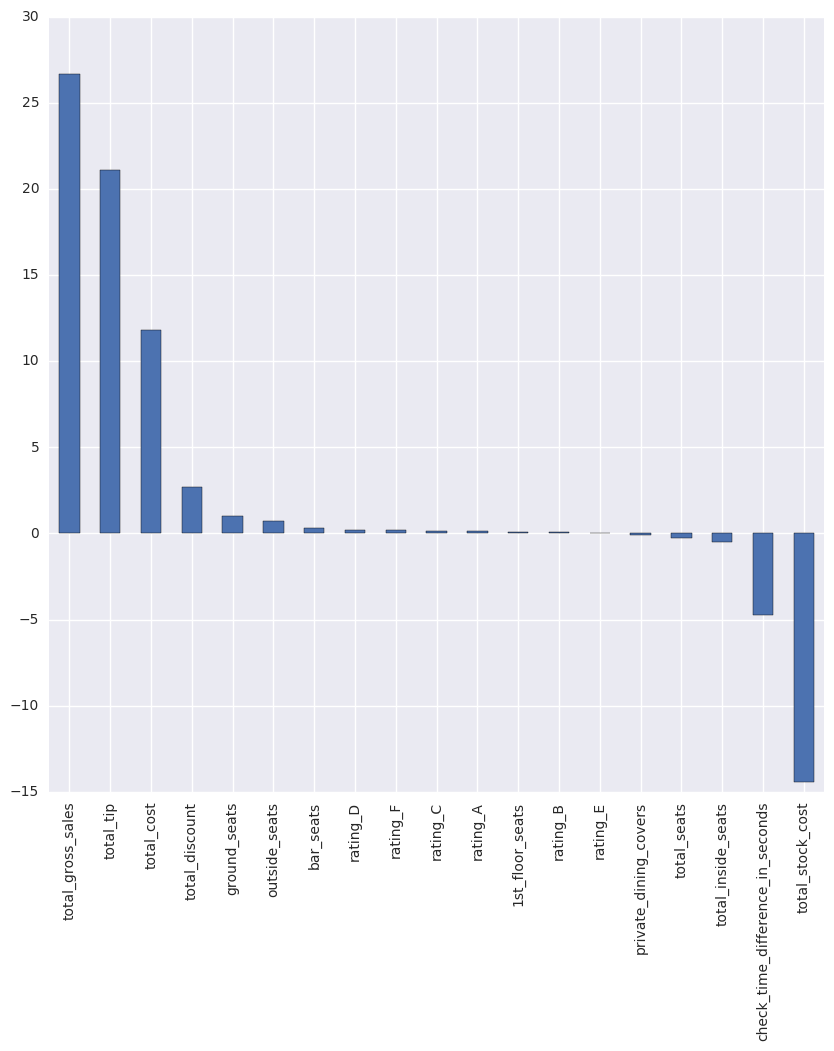

In [51]:
#================Plot==================
importances=pd.Series(lr.coef_[2],index=other_features)
importances.sort_values(inplace=True,ascending=False)
importances.plot(kind="bar", figsize=(10,10));
plt.show()